#### Titanic Dataset - The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this simple and small introductory machine learning model, we will be focusing on predicting the survival. But it will be with a subset of original dataset just in order to keep the process simple and light

Any datascience project will be build on few core steps. However, the options which we have to deal with the data is multiple. Here we will be following the below mentioned steps

 1. Data Gathering
 2. Exploratory Data Analysis (EDA)
 3. Feature Engineering 
   - Outlier Treatment
   - Handling Missing Value
   - Handling Categorical Variable
 4. Feature Selection
   - Check for Feature Importance
 5. Modelling
   - Logistic Regression
   - Check and Rectify Gaussian Distribution
   - Rescalling of Data
   - Train-Test Split
   - Model Creation & testing

In [722]:
# import necessary libraries
import numpy as np # linear algebra
import pandas as pd # Data Processing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1. Data Gathering

In [723]:
#import the dataset
df = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Kaggle_projects\Taitanic\New folder\train.csv")
df_test = pd.read_csv(r"C:\Users\91973\Desktop\Data_Science\Kaggle_projects\Taitanic\New folder\test.csv")

In [724]:
# Taking a small subset of the data
df = df[['PassengerId','Age','Sex','Fare','Embarked','Survived']]

### 2. Exploratory Data Analysis (EDA)

In [725]:
df.shape

(891, 6)

In [726]:
df.head()

,PassengerId,Age,Sex,Fare,Embarked,Survived
0,1,22.0,male,7.2500,S,0
1,2,38.0,female,71.2833,C,1
2,3,26.0,female,7.9250,S,1
3,4,35.0,female,53.1000,S,1
4,5,35.0,male,8.0500,S,0


Since we have seen the dataset now, let us understand the each column

    PassengerId: Unique Id
    Age: Age of the Passenger
    Sex: Gender of the person (Male , Female)
    Fare:Price of the ticket
    Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    Survived: This is our target variable (0 = No, 1 = Yes)

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    891 non-null int64
Age            714 non-null float64
Sex            891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 41.8+ KB


In [728]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000


**Check for data imbalance in target variable**

In [729]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Check for column with unique values**

In [730]:
for i in df.columns:
    if len(df[i].value_counts())==1:
        print(i)

we do not have any column with unique value

**Check for Outlier**

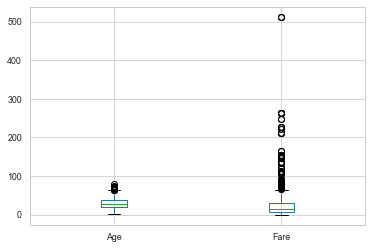

In [731]:
df[['Age','Fare']].plot.box()

We can see that there is outlier present in both the column

**Check for multicollinearity**

In [732]:
cor = df[['Age','Fare']].corr()

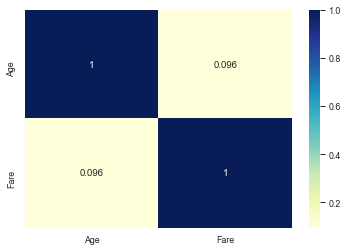

In [733]:
#Heatmap
sns.heatmap(cor,cmap='YlGnBu',annot=True)

**Check for missing value**

In [734]:
df.isnull().sum()

PassengerId      0
Age            177
Sex              0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [735]:
df.isnull().sum()/df.shape[0]

PassengerId    0.000000
Age            0.198653
Sex            0.000000
Fare           0.000000
Embarked       0.002245
Survived       0.000000
dtype: float64

We can see that there is a good number of missing value present in Age Column with a very small amount in Embarked column

**Check for distribution of the data**

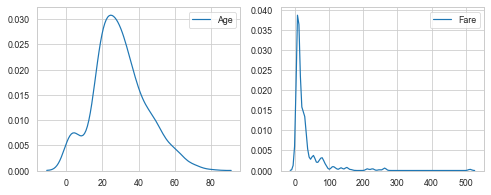

In [736]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.kdeplot(df['Age'])
plt.subplot(1,2,2)
sns.kdeplot(df['Fare'])

We can see that Age almost has a normal distribution but Fair column is right skewed and it is not normally distributed

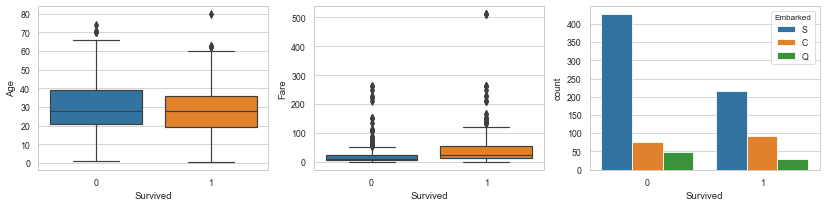

In [737]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
sns.boxplot(x='Survived',y='Age',data = df)
plt.subplot(1,3,2)
sns.boxplot(x='Survived',y='Fare',data = df)
plt.subplot(1,3,3)
sns.countplot(x='Survived',hue='Embarked',data = df)
plt.show()

We can see that\
 a. Mean age of people those who survived and not survived are almost same
 b. We might have some interesting insight from Fare column as people those who survived had ticket of higher class. However, we also have big outlier there which says that people from high-class ticket were most likely to survived
 c. Most Passengers embarked from Southampton could not able to survuved

### 3. Feature Engineering

**Handle Oulier by IQR method**

In [738]:
col = ['Age','Fare']
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.70)
IQR = Q3 - Q1
print(IQR)

Age     15.8750
Fare    19.0896
dtype: float64


In [739]:
df1 = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [740]:
df1.shape

(734, 6)

Now let us check for the outlier once again

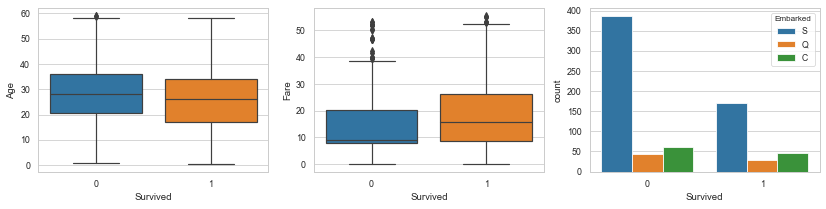

In [741]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
sns.boxplot(x='Survived',y='Age',data = df1)
plt.subplot(1,3,2)
sns.boxplot(x='Survived',y='Fare',data = df1)
plt.subplot(1,3,3)
sns.countplot(x='Survived',hue='Embarked',data = df1)
plt.show()

Now we can see that people from higher ticket fair survived more compare to those who had less ticket fair or from below class

**Handling Missing Value**

#### a.Missing value imputation using random imputation

In [742]:
random_sample = df1['Age'].dropna().sample(df1['Age'].isnull().sum(),random_state = 0)
# random_state ensures that each time the random set which is taken is same

In [743]:
#Assign the index number of null rows to this set of data
random_sample.index = df1[df1['Age'].isnull()].index

In [744]:
df1['Age_random']=df1.Age.replace(np.NaN,random_sample)

#### b.Handle missing value with median

In [745]:
df1['Age_Median']=df1['Age'].fillna(df1.Age.median())

In [746]:
df1['Age'].median()

27.0

#### c.Handle missing value with median by each category of Embarked

In [747]:
#Group the data based on Embarked & Sex
df1_grouped = df1.groupby(['Embarked','Sex'])

In [748]:
df1_grouped.Age.median()

Embarked  Sex   
C         female    17.0
          male      29.0
Q         female    21.0
          male      25.0
S         female    27.0
          male      28.0
Name: Age, dtype: float64

In [749]:
df1['Age_group_median']=df1['Age']

In [750]:
df1.Age_group_median = df1_grouped.Age.apply(lambda x: x.fillna(x.median()))

In [751]:
df1.head()

,PassengerId,Age,Sex,Fare,Embarked,Survived,Age_random,Age_Median,Age_group_median
0,1,22.0,male,7.2500,S,0,22.0,22.0,22.0
2,3,26.0,female,7.9250,S,1,26.0,26.0,26.0
3,4,35.0,female,53.1000,S,1,35.0,35.0,35.0
4,5,35.0,male,8.0500,S,0,35.0,35.0,35.0
5,6,NaN,male,8.4583,Q,0,23.0,27.0,25.0


Text(0, 0.5, 'Probability Density')

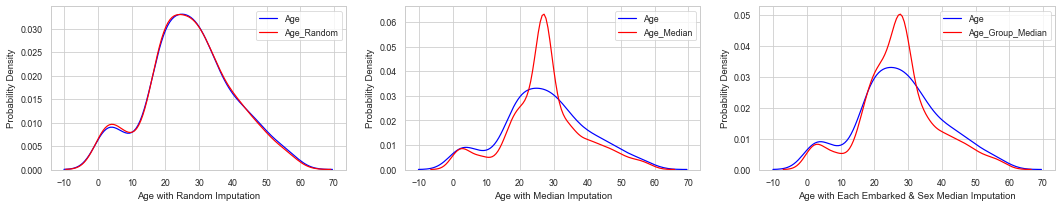

In [752]:
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
sns.kdeplot(df1.Age,color = 'b',shade=False,Label='Age')
sns.kdeplot(df1.Age_random,color = 'r',shade=False,Label='Age_Random')
plt.xlabel('Age with Random Imputation')
plt.ylabel('Probability Density')
plt.subplot(1,3,2)
sns.kdeplot(df1.Age,color = 'b',shade=False,Label='Age')
sns.kdeplot(df1.Age_Median,color = 'r',shade=False,Label='Age_Median')
plt.xlabel('Age with Median Imputation')
plt.ylabel('Probability Density')
plt.subplot(1,3,3)
sns.kdeplot(df1.Age,color = 'b',shade=False,Label='Age')
sns.kdeplot(df1.Age_group_median,color = 'r',shade=False,Label='Age_Group_Median')
plt.xlabel('Age with Each Embarked & Sex Median Imputation')
plt.ylabel('Probability Density')

We can see that random imputation has done a great job to impute the dataset. Hence, Let us continue with Random Sample imputation and drop the other columns

In [753]:
df1['Age']=df1['Age_random']

In [754]:
df1.drop(['Age_random','Age_Median','Age_group_median'],axis=1,inplace = True)

In [755]:
df1.isnull().sum()

PassengerId    0
Age            0
Sex            0
Fare           0
Embarked       0
Survived       0
dtype: int64

**Handle categorical valriable**

In [756]:
df1.Embarked.value_counts()

S    555
C    106
Q     73
Name: Embarked, dtype: int64

Since it is a nominal categorical variable, we can contiue with one hot encoding

In [757]:
embarked_dm=pd.get_dummies(df1[['Embarked']],drop_first = True)

In [758]:
df1 = pd.concat([df1,embarked_dm],axis=1)

In [759]:
df1.head()

,PassengerId,Age,Sex,Fare,Embarked,Survived,Embarked_Q,Embarked_S
0,1,22.0,male,7.2500,S,0,0,1
2,3,26.0,female,7.9250,S,1,0,1
3,4,35.0,female,53.1000,S,1,0,1
4,5,35.0,male,8.0500,S,0,0,1
5,6,23.0,male,8.4583,Q,0,1,0


In [760]:
df1.drop('Embarked',axis=1,inplace = True)

In [761]:
#Now convert the male and female to 0 and 1
df1.Sex = df1.Sex.map({"male": 0, "female":1})

In [762]:
df1.head()

,PassengerId,Age,Sex,Fare,Survived,Embarked_Q,Embarked_S
0,1,22.0,0,7.2500,0,0,1
2,3,26.0,1,7.9250,1,0,1
3,4,35.0,1,53.1000,1,0,1
4,5,35.0,0,8.0500,0,0,1
5,6,23.0,0,8.4583,0,1,0


### 4.Feature Importance and Feature Selection

The number of column in our dataset is low and it does not required any reduction in number of columns. But let us check the feature importance here

In [763]:
#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [764]:
X = df1.drop('Survived',axis=1)
y = df1['Survived']

In [765]:
# initiate ExtreesClassifier object
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [766]:
print(model.feature_importances_)

[0.24940264 0.22640547 0.24006117 0.25676791 0.01188801 0.0154748 ]


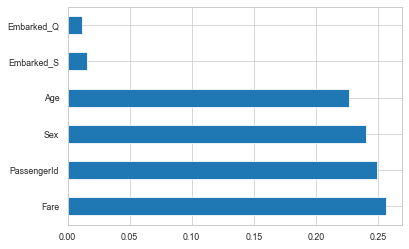

In [767]:
important_feature =pd.Series(model.feature_importances_,index=X.columns)
important_feature.nlargest(10).plot(kind='barh')
plt.show()

### 5.Modelling

**Gaussian Transformation**

We have seen that the Fare column is not normally distributed. For Logistic Regression, we require it to be transformed as much as possible to get a better accuracy

In [768]:
df1_Logreg = df1.copy()

In [769]:
import scipy.stats as stats

In [770]:
#create the function for the Histogram & Q-Q Plot
def dist_verify(df,feature):
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title('Probability Plot')
    plt.show()

**Log Transformation**

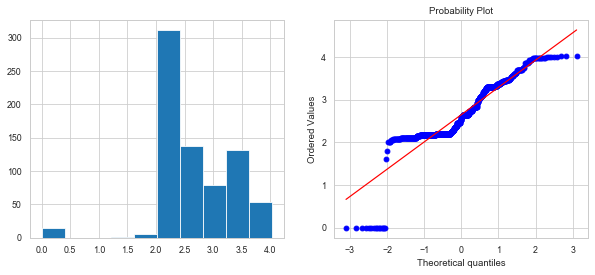

In [771]:
df1_Logreg['Log_Fare']=np.log(df1_Logreg['Fare']+1)
dist_verify(df1_Logreg,'Log_Fare')

**Reciprocal transformation**

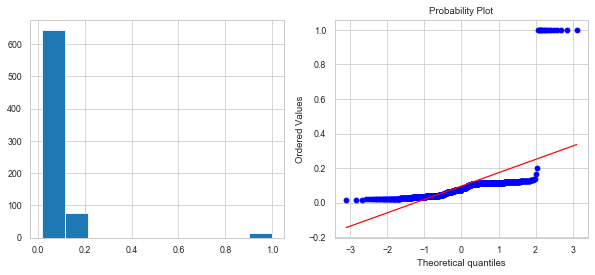

In [772]:
df1_Logreg['Rec_Fare']=1/(df1_Logreg['Fare']+1)
dist_verify(df1_Logreg,'Rec_Fare')

**Sqaure Root Tansformation**

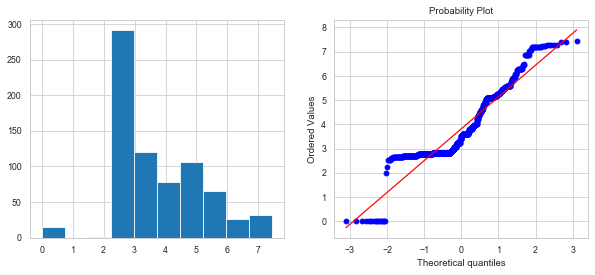

In [773]:
df1_Logreg['sqr_Fare']=df1_Logreg['Fare']**(1/2)
dist_verify(df1_Logreg,'sqr_Fare')

**Exponential Tranformation**

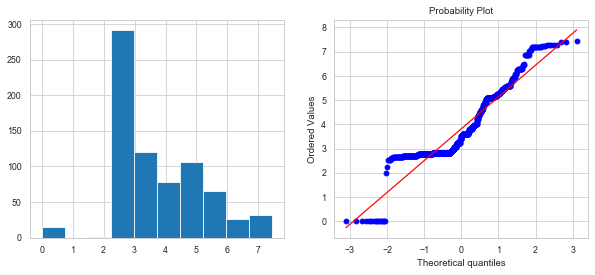

In [774]:
df1_Logreg['Exp_Fare']=df1_Logreg['Fare']**(1/5)
dist_verify(df1_Logreg,'sqr_Fare')

**BoxCox Transformation**

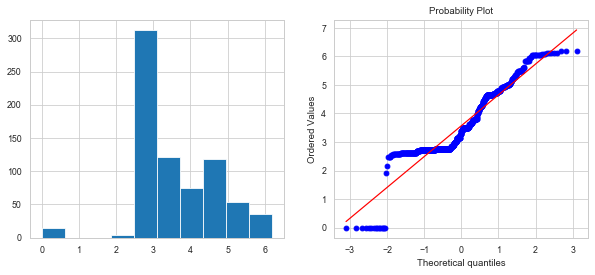

In [775]:
df1_Logreg['Fare_boxcox'], param = stats.boxcox(df1_Logreg.Fare+1)
dist_verify(df1_Logreg, 'Fare_boxcox')

Let us go ahead with square root transformation

In [776]:
df1_Logreg['Fare']=df1_Logreg['sqr_Fare']

In [777]:
df1_Logreg.drop(['Log_Fare','Rec_Fare','sqr_Fare','Exp_Fare','Fare_boxcox'],axis=1,inplace = True)

Now let us compare the Fare column once again

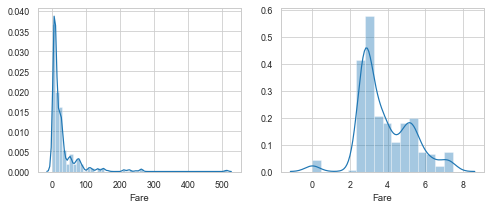

In [778]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.distplot(df['Fare'])
plt.subplot(1,2,2)
sns.distplot(df1_Logreg['Fare'])

Train Test Split

In [779]:
from sklearn.model_selection import train_test_split

In [780]:
# Store independant variables to X
X = df1_Logreg.drop(['Survived'], axis = 1)
# Store dependant variable to y
y = df1_Logreg['Survived']

In [781]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (513, 6)
X_test: (221, 6)
y_train: (513,)
y_test: (221,)


**Rescalling the features**

In [782]:
from sklearn.preprocessing import StandardScaler

In [783]:
#Initiate a Scaler Object
scaler = StandardScaler()

In [784]:
varlist = ['Age','Fare']
X_train[varlist]=scaler.fit_transform(X_train[varlist])

In [785]:
X_train.head()

,PassengerId,Age,Sex,Fare,Embarked_Q,Embarked_S
13,14,0.916964,0,1.313673,0,1
188,189,0.995302,0,0.090017,1,0
680,681,1.151976,1,-0.711541,1,0
611,612,-2.059856,0,-0.857491,0,1
575,576,-0.649783,0,-0.005425,0,1


In [786]:
X_train.drop('PassengerId',axis=1,inplace = True)
X_test.drop('PassengerId',axis=1,inplace = True)

**Logistic Regression**

In [787]:
from sklearn.linear_model import LogisticRegression

In [788]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [789]:
# Getting the predicted values on the train set
y_train_pred = logreg.predict(X_train)
y_train_pred[:10]

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [790]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,PassengerId
0,0,0,13
1,0,0,188
2,0,1,680
3,0,0,611
4,0,0,575


**Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0**

In [791]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,PassengerId,predicted
0,0,0,13,0
1,0,0,188,0
2,0,1,680,1
3,0,0,611,0
4,0,0,575,0


In [792]:
from sklearn import metrics

In [793]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[290  57]
 [ 56 110]]


In [794]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7797270955165692


**Metrics calculation beyond simply accuracy**

In [795]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [796]:
print('TP: '+str(TP))
print('TN: '+str(TN))
print('FP: '+str(FP))
print('FN: '+str(FN))

TP: 110
TN: 290
FP: 57
FN: 56


In [797]:
# sensitivity of the model
Sensitivity = TP / float(TP+FN)
# specificity of the model
specificity = TN / float(TN+FP)
# false postive rate of the model
False_Positive_Rate = FP/ float(TN+FP)
#Precision
Precision = TP / float(TP+ FP)
print("Sensitivity or True Positive Rate or Recall: "+str(Sensitivity))
print("Specificity: "+str(specificity))
print("False Positive Rate: "+str(False_Positive_Rate))
print("Precision or Posotive Predicted Value: "+str(Precision))

Sensitivity or True Positive Rate or Recall: 0.6626506024096386
Specificity: 0.8357348703170029
False Positive Rate: 0.1642651296829971
Precision or Posotive Predicted Value: 0.6586826347305389


We can see that Accuracy of the model is moderate but Sensitivity is little low.Which means that model has an average ability to predict people who survived correctly, However, Specificity of the model is good.It means that model has an good ability to predict prople who did not survived.
Let us check the ROC curve of the model

In [798]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Graph')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [799]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

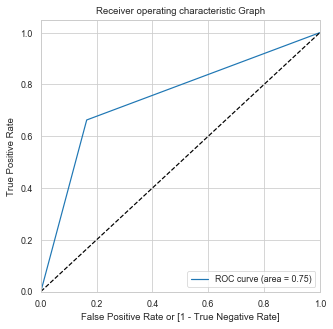

(array([0.        , 0.16426513, 1.        ]),
 array([0.       , 0.6626506, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [800]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

We need to scal the test set also

In [801]:
X_test[varlist] = scaler.transform(X_test[varlist])

In [802]:
y_test_pred = logreg.predict(X_test)

In [803]:
y_test_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [804]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [805]:
# Convert y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

In [806]:
# Putting LeadID to index
y_test_df['PassengerId'] = y_test_df.index

In [807]:
y_test_df.head()

,Survived,PassengerId
228,0,228
217,0,217
15,1,15
36,1,36
470,0,470


In [808]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [809]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [810]:
y_pred_final.head()

,Survived,PassengerId,0
0,0,228,0
1,0,217,0
2,1,15,1
3,1,36,0
4,0,470,0


In [811]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [812]:
# Rearrange the columns
y_pred_final = y_pred_final.reindex_axis(['PassengerId','Survived','Conversion_Prob'], axis=1)

In [813]:
# Let's see the head of y_pred_final
y_pred_final.head()

,PassengerId,Survived,Conversion_Prob
0,228,0,0
1,217,0,0
2,15,1,1
3,36,1,0
4,470,0,0


**Use probability threshold value of 0.20 on the test dataset to predict if a lead will convert or not**

In [814]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.20 else 0)

In [816]:
# check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)
acc_score

0.7828054298642534

So the model is working almost same on test set 